# Terza Esercitazione
## Infiltrazione dell'acqua in una colonna di suolo

# manca commento sul perchè vengono così i grafici e sistemare i grafici
L'obiettivo della terza parte dell'esercitazione è quello di studiare l'infiltrazione dell'acqua all'interno di una colonna a più strati di suolo attraverso l'equazione di Richards (1D). Quest'ultima rappresenta infatti l'equazione di conservazione della massa all'interno del suolo e tiene conto di un termine gravitativo, uno avvettivo ed uno diffusivo:

\begin{equation}
\frac{\delta\theta}{\delta t} + \frac{\delta}{\delta z}(K(\theta_{w}\cdot\frac{\delta(\phi + z)}{\delta z})
\end{equation}

In caso, infatti, di disequilibrio nel carico idraulico, si deve venire a formare un movimento dell'acqua perchè venga compensato.

La trattazione in questo caso sarà discreta per semplificare il problema: vengono quindi considerati i valori in alcuni punti nel dominio e dev'essere a questo fine introdotta una griglia. Per avere risultati più precisi sarà poi necessario infittire i punti che formano la griglia: può inoltre essere interessante averla più fitta in vicinanza della superficie rispetto a punti più in profondità, in modo da avere informazioni nei punti che più ci interessano senza appesantire troppo il programma.

L'equazione di Richards è in generale valida per i suoli insaturi, può però essere anche estesa a quelli saturi
è necessario, per eseguire il programma, assegnare un dominio di calcolo, la griglia di calcolo e un dominio iniziale.

Vengono importati i file .csv relativi alla griglia, alle condizioni iniziali e al modello utilizzato per la risoluzione (che in questo caso il modello sarà quello di Van Genuchten).

Nella prima simulazione viene preso in considerazione un suolo formato da due strati:
- Sabbia fino ad una profondità di 0.3m
- Argilla Limosa fino ad una profondità di 2m

Per quello che riguarda invece la condizione iniziale si parte assegnando una condizione idrostatica, di equlibrio, in modo che l'evoluzione poi nel tempo dipenda solo dalle condizioni al contorno. Poniamo quindi alla profondità -2 la suzione pari a 0 (quindi la transizione tra suolo saturo e insaturo) mentre in superficie ci sarà una suzione di -2.

Si procede, quindi, andando a creare la griglia a partive dai file .csv descritti.

In [1]:
import os
import pandas as pd #leggere file csv

from geoframepy.whetgeo1d import grid_creator 
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
project_path = os.path.dirname(os.getcwd())

ModuleNotFoundError: No module named 'geoframepy'

Questo grafico mostra il valore della suzione in funzione della profondità del suolo in due diversi momenti: sono stati scelti come valori uno di poco successivo all'inizio della simulazione e un altro, a distanza di 21h. è evidente come lentamente il grafico si distanzi dalla condizione iniziale.

Un altro interessante metodo di visualizzazione prevede di prendere due punti ad una data profondità, che in questo caso sarà 10 cm e 70 cm, e osservare l'andamento della suzione al passare del tempo.



# aggiungere legenda nel grafico di prima per i colori

In [67]:
grid_input_file_name = project_path + "/data/Grid_input/ex02_grid.csv"
ic_input_file_name = project_path + "/data/Grid_input/ex02_ic.csv" 
parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv" #parametri per alcuni set di suolo
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"
grid_type = 'classical'
dz_min = 0.005
dz_max = 0.1
b = 0.1
psi_interp_model = "linear"
T_interp_model = "linear"

In [68]:
output_file_name =  project_path + "/data/Grid_NetCDF/Ric2.nc"
output_title = '''Griglia per la risoluzione dell'equazione di Richards.
                  '''
output_date = ''

output_summary = ''' 

Type,eta,K,equationStateID,parameterID
L,0,50,0,1
L,-1.5,30,0,10
L,-2,0,nan,nan


eta,Psi0,T0
-0.0,-2.0,273.15
-2.0,0.0,273.15

'''


output_institution = 'GEOframe'

In [69]:
data_grid = pd.read_csv(grid_input_file_name)
print('Grid')
print(data_grid)
print()

data_ic = pd.read_csv(ic_input_file_name)
print('IC')
print(data_ic)
print()

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
print('Parameter')
print(data_parameter)
print()

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                   theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                   output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)

Grid
  Type  eta   K  equationStateID  parameterID
0    L  0.0  50              0.0          1.0
1    L -0.3  50              0.0         10.0
2    L -2.0   0              NaN          NaN

IC
   eta  Psi0      T0
0 -0.0  -2.0  273.15
1 -2.0   0.0  273.15

Parameter
    thetaS  thetaR     n  alpha  alphaSpecificStorage  betaSpecificStorage  \
0     0.43   0.045  2.68   14.5          1.000000e-08         4.400000e-10   
1     0.41   0.057  2.28   12.4          1.000000e-08         4.400000e-10   
2     0.41   0.065  1.89    7.5          1.000000e-08         4.400000e-10   
3     0.45   0.067  1.41    2.0          1.000000e-08         4.400000e-10   
4     0.43   0.078  1.56    3.6          1.000000e-08         4.400000e-10   
5     0.39   0.100  1.48    5.9          1.000000e-08         4.400000e-10   
6     0.43   0.089  1.23    1.4          1.000000e-08         4.400000e-10   
7     0.41   0.095  1.31    1.9          1.000000e-08         4.400000e-10   
8     0.38   0.100  1.23    2.7

In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
%matplotlib inline

import math
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid') #vari stili per non avere lo stile bianco

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True, #se vogliamo cornice, etc
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

plt.rcParams.update(nice_fonts)

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
project_path = os.path.dirname(os.getcwd())

Vengono quindi definite altre funzioni, specificando le condizioni al contorno, che in questo caso, sono quella di Dirichlet per la superficie superiore mentre, per quella inferiore, si assume suzione nulla.

In [74]:
os.chdir(project_path+'/output')
os.listdir()


['ex00_0000.nc',
 'ex00_canc_0000.nc',
 'ex01_0000.nc',
 'ex02_0000.nc',
 'ex02_new_0000.nc',
 'ex03_dry_0000.nc',
 'ex03_wet_0000.nc',
 'ex04_0000.nc',
 'ex04_deep_0000.nc',
 'ex05_15C_0000.nc',
 'ex05_30C_0000.nc',
 'ex05_5C_0000.nc',
 'ex06_0000.nc',
 'ex06_calibrated_0000.nc',
 'ex06_simulated_psi.csv',
 'ex06_simulated_theta.csv',
 'ex07_0000.nc',
 'ex07_simulated_psi.csv',
 'ex07_simulated_theta.csv',
 'ex08_0000.nc',
 'Integrate PDE',
 'Ri21_0000.nc',
 'Ric1_0000.nc',
 'Ric2_0000.nc',
 'richardsCalib']

In [75]:
ds = xr.open_dataset("Ric2_0000.nc")
ds

<xarray.Dataset>
Dimensions:           (depth: 100, dualDepth: 100, time: 1441)
Coordinates:
  * depth             (depth) float64 -1.983 -1.949 -1.915 ... -0.009 -0.003
  * dualDepth         (dualDepth) float64 -2.0 -1.966 -1.932 ... -0.012 -0.006
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-02
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex00.
    Top_boundary_condition:             Top Dirichlet
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:\Users\titab\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\titab\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\titab\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

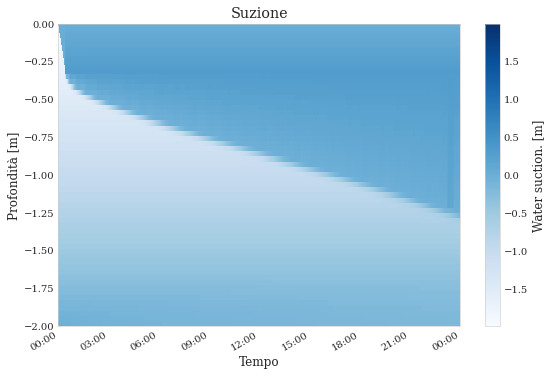

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.plot(ax=ax, y='depth', cmap='Blues') 

ax.set_title('Suzione')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Tempo')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_tick_params(rotation=45)

plt.show()

L'andamento del grafico rappresenta quanto ci si aspetterebbe in presenza di una lama d'acqua al di sopra del suolo: il comportamento è decisamente più drenante nella sabbia, ma in generale anche nell'argilla si nota come la lama d'acqua si muova poi verso il basso.

Viene riportata poi l'immagine estratta da una simulazione svolta con una griglia con un numero minore di punti nello strato di argilla limosa: è evidente come in quel caso la qualità del grafico fosse molto più bassa e per questo si è deciso di aumentare il numero di punti che discretizzavano lo strato, impostando $ K = 50 $

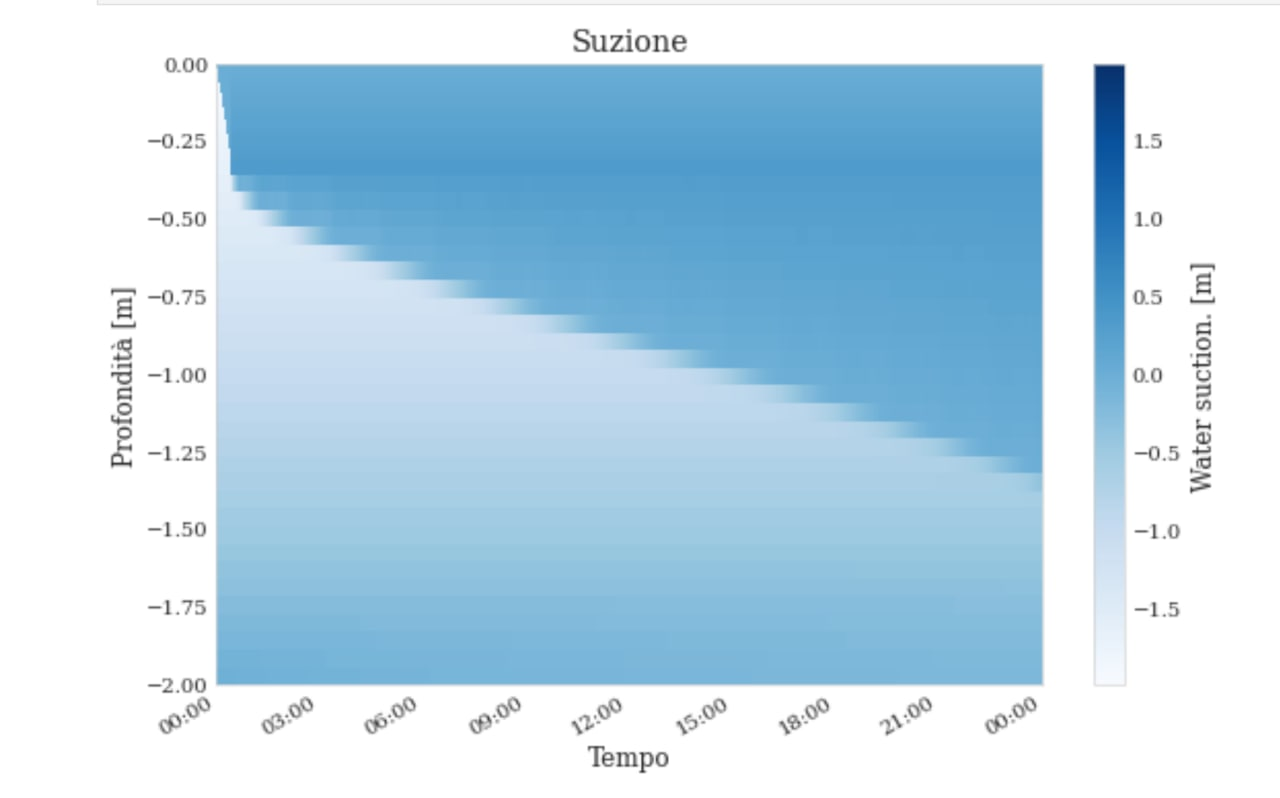

In [79]:
Image("/Users/titab/Desktop/Test_GEOframe_verona/OMS_Project_WHETGEO1D_Idrologia_ay_21_22/Suzione.jpg")

In [59]:
ds.time.values

array(['2020-01-01T00:00:00.000000000', '2020-01-01T00:01:00.000000000',
       '2020-01-01T00:02:00.000000000', ...,
       '2020-01-01T23:58:00.000000000', '2020-01-01T23:59:00.000000000',
       '2020-01-02T00:00:00.000000000'], dtype='datetime64[ns]')

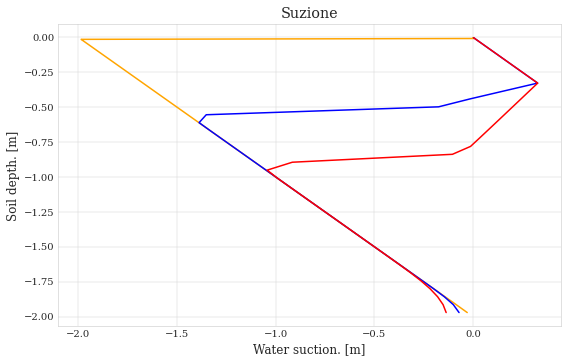

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.sel(time= '2020.01.01 00:00').plot(ax=ax, y='depth', color='orange') #boh, si potrebbe prendere in considerazione anche più valori contemporaneamente sia dal punto di vista della durata sia della profondità ma non so bene come
ds.psi.sel(time='2020-01-01 02:00').plot(ax=ax, y='depth', color='blue') #anche in questo caso prendiamo il dataset, la variabile che vogliamo settare e il timestep che vogliamo selezionare
#dopo aver selezionato il timestep facciamo un plot specificando la coordinata sull'asse y e il colore della linea
ds.psi.sel(time='2020-01-01 11:00').plot(ax=ax, y='depth', color='red')
ax.set_title('Suzione')
# ax.set_ylabel('text')
# ax.set_xlabel('text')

plt.show()

Questo grafico mostra il valore della suzione in funzione della profondità del suolo in due diversi momenti: sono stati scelti come valori uno di poco successivo all'inizio della simulazione e un altro, a distanza di 21h. è evidente come lentamente il grafico si distanzi dalla condizione iniziale idrostatica.

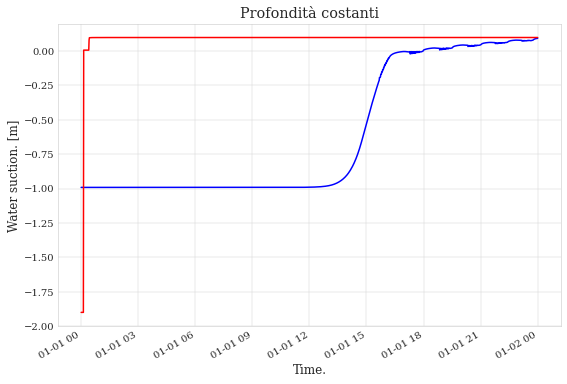

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.sel(depth=-1, method='nearest').plot(ax=ax, color='blue')
ds.psi.sel(depth=-0.1, method='nearest').plot(ax=ax, color='red') #coordinata più vicina alla superficie
# ax.set_title('text')
# ax.set_ylabel('text')
# ax.set_xlabel('text')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_tick_params(rotation=45)
ax.set_title("Profondità costanti")
plt.show()

#funzione inizia ad aumentare solo verso la fine

## aggiungere legenda per i due colori

# Precipitazione su suolo Multi-Strato

Si ripete poi la trattazione cambiando la condizione al contorno. Invece di una lama d'acqua in superficie si prende in considerazione una precipitazione impattante suol suolo: in questo caso le condizioni sulla superficie sono di Neumann e non di Dirichlet.

In [82]:
ds = xr.open_dataset("Ric2_Pioggia_0000.nc")
ds

<xarray.Dataset>
Dimensions:           (depth: 100, dualDepth: 100, time: 1441)
Coordinates:
  * depth             (depth) float64 -1.983 -1.949 -1.915 ... -0.009 -0.003
  * dualDepth         (dualDepth) float64 -2.0 -1.966 -1.932 ... -0.012 -0.006
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-02
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex00.
    Top_boundary_condition:             Top Neumann
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:\Users\titab\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\titab\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\titab\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

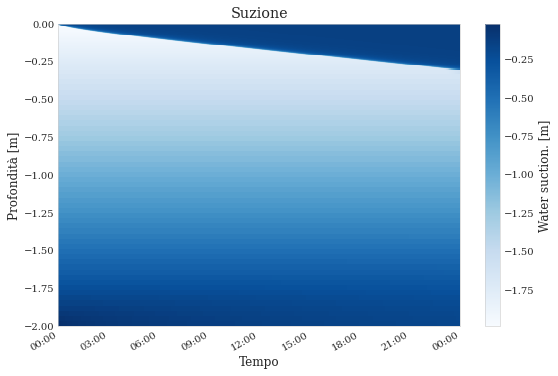

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.plot(ax=ax, y='depth', cmap='Blues') 

ax.set_title('Suzione')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Tempo')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_tick_params(rotation=45)

plt.show()

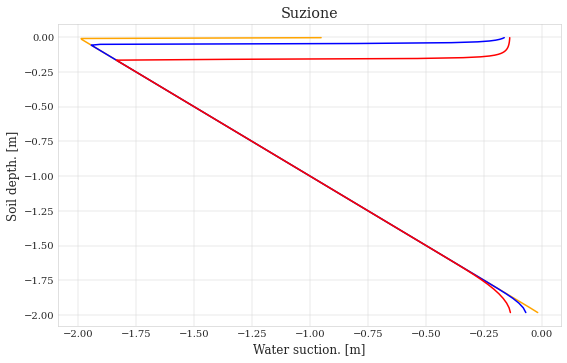

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.sel(time= '2020.01.01 00:00').plot(ax=ax, y='depth', color='orange') #boh, si potrebbe prendere in considerazione anche più valori contemporaneamente sia dal punto di vista della durata sia della profondità ma non so bene come
ds.psi.sel(time='2020-01-01 02:00').plot(ax=ax, y='depth', color='blue') #anche in questo caso prendiamo il dataset, la variabile che vogliamo settare e il timestep che vogliamo selezionare
#dopo aver selezionato il timestep facciamo un plot specificando la coordinata sull'asse y e il colore della linea
ds.psi.sel(time='2020-01-01 11:00').plot(ax=ax, y='depth', color='red')
ax.set_title('Suzione')
# ax.set_ylabel('text')
# ax.set_xlabel('text')

plt.show()

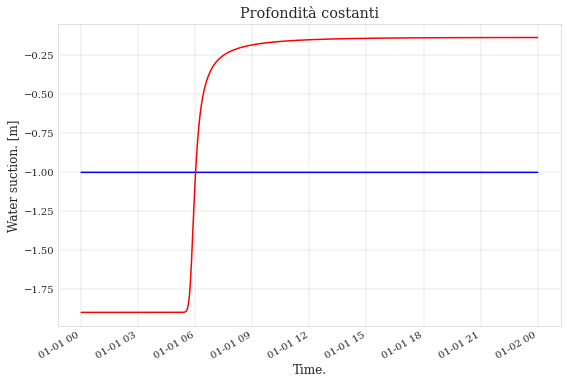

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.sel(depth=-1, method='nearest').plot(ax=ax, color='blue')
ds.psi.sel(depth=-0.1, method='nearest').plot(ax=ax, color='red') #coordinata più vicina alla superficie
# ax.set_title('text')
# ax.set_ylabel('text')
# ax.set_xlabel('text')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_tick_params(rotation=45)
ax.set_title("Profondità costanti")
plt.show()


- se vogliamo caso con la pioggia dobbiamo cambiare solo la condizione al contorno = top neumann e non dirichlet.
l'unico modo per specificare nel codice che i valori sono di flusso e non di suzione è di cambiare con top neumann da top dirichlet
se prima abebamo suzione costante nel tempo, questa vola abbiamo due picchi di pioggia = quando inizia a piovere il suolo inizia a saturare = picco in corrispondenza del picco di precipitazione
risposta della suzione quasi istantanea = se siamo in profondità la curva inizia a salire un po' dopo e il picco è un po' meno pronunciato

- Produzione di runoff superficiale dovuto a eccesso rispetto a quello che c'è nel suolo. 
fin tanto che l'intensità di pioggia è maggiore della capacità di infiltrazione, parte di acqua si accumula in superficie. quello che succede in questo caso è che la condizione al contorno non è una semplice condizione tipo neumann. bisogna tener conto del volume che si accumula in superficie avendo in input la pioggia. questo è più semplice di cambiare la condizione al contorno al cambiare della presenza o meno di acuqa in superficie. water ponding dopo un po' decresce in questo caos

#griglia classica = vc per ogni layer

- produzione di runoff perchè il suolo continua a saturarsi = in questo caso abbiamo come condizioni a contorno la precipitazione.

sabbia
argilla limosa